## **QUESTION 1**

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import scipy.optimize as opt


data = loadmat('/content/drive/MyDrive/DATA_EQarrival.mat', squeeze_me=True) #loading the file

t = data['t']
y = data['y']    #explicitly assigning t and y

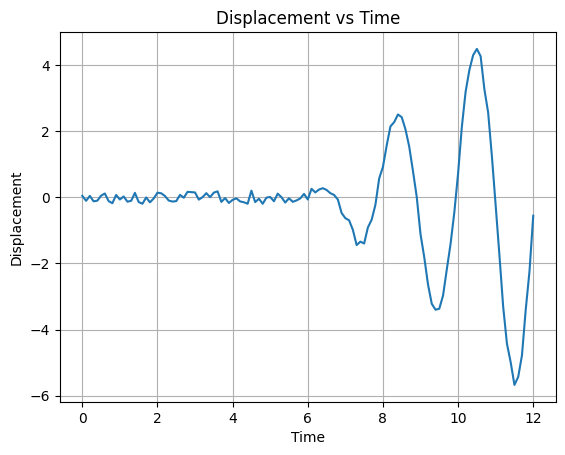

In [ ]:
# plotting just to check if dataset works
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Displacement vs Time')
plt.grid(True)
plt.show()

In [ ]:
def EQuake_func(t0, period, phi, t_arr):
    """
    INPUT:
    t: Time array
    A: Amplitude of the wave
    period: period of sine wave
    phi: phase difference.
    t_arr: Arrival time of the first seismic energy.

    OUPUT:
    y: y(t) function.
    """

    y = np.where(t_arr < t0, 0, (t_arr - t0) * np.sin((2 * np.pi / period) * (t_arr - t0) + phi))
    # using np.where took; same as HW 1
    return y

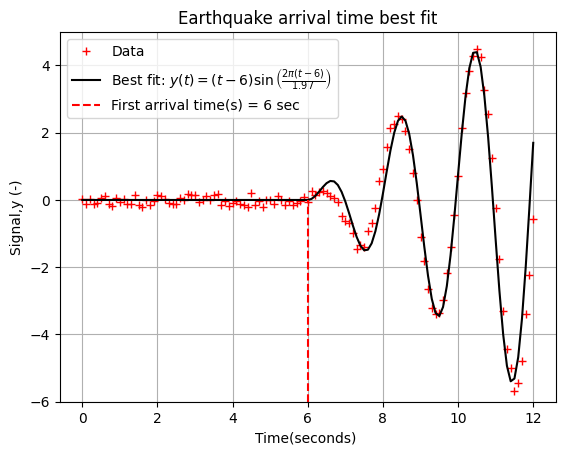

In [ ]:
 #guess function; played around with values here
yg = EQuake_func(6,2,np.pi/13.8, t)


guesses = [6, 1.97, 0] #making an array of guesses

pout, cout = opt.curve_fit(EQuake_func, t, yg, p0 = guesses)
 #curve_fit so much nicer than linear


fitted_curve = EQuake_func(*pout, t) # defining fitted_curve for graphing yesterday

plt.plot(t,y, '+r', label = "Data")
plt.plot(t, fitted_curve, '-k',
         label=r'Best fit: $y(t) = (t-6)\sin\left(\frac{2\pi(t-6)}{1.97}\right)$')


plt.ylim(-6, )
# setting limit to -6 in order to know the y index for the dashed line representing arrival time
plt.plot([6, 6], [-6, 0], color='r', linestyle='--',
         label = 'First arrival time(s) = 6 sec')
# dashed line representing arrival time

plt.legend()
plt.xlabel('Time(seconds) ')
plt.ylabel('Signal,y (-)')
plt.title('Earthquake arrival time best fit')

plt.grid(True)
plt.show()




## **QUESTION 2**

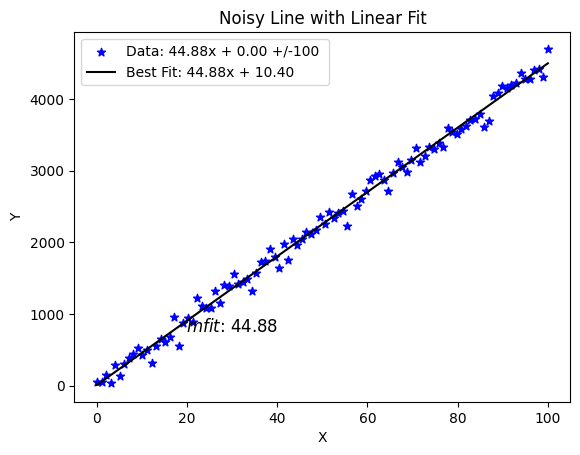

Slope of  line: 44.87956940724607


In [121]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noisy_line(x_range, slope_range=(-50, 50), noise_amplitude=100):

    """
    INPUT:
    x_range: range of x values
    slope_range: range of slopes
    noise amplitude: defined as 100

    OUTPUT:
    x_noisy:
    """

    slope = np.random.uniform(slope_range[0], slope_range[1]) # random slope


    x_noisy = np.linspace(x_range[0], x_range[1], 100) # generating x values


    y_noisy = slope * x_noisy + np.random.normal(0, noise_amplitude, x_noisy.shape)
    #generating y values with noise


    pfit = np.polyfit(x_noisy, y_noisy, 1) #using polyfit here

    m_noisy, b_noisy = pfit #parameters

    bestfit = m_noisy*x_noisy + b_noisy #bestfit

    plt.scatter(x_noisy, y_noisy,marker = '*', color = 'blue',
                label='Data: {:.2f}x + 0.00 +/-100 '.format(m_noisy)) #raw data

    plt.plot(x_noisy, bestfit, color='black', label=('Best Fit: {:.2f}x + {:.2f}'.format(m_noisy, b_noisy)))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Noisy Line with Linear Fit')

    plt.annotate('$mfit$: {:.2f}'.format(m_noisy), xy=(80, 50), xycoords='axes points', fontsize=12)

    plt.legend()
    plt.show()

    return x_noisy, y_noisy, m_noisy, b_noisy

x_noisy, y_noisy, m_noisy, b_noisy = generate_noisy_line((0, 100),
                                                         slope_range=(-50, 50), noise_amplitude=100) #allign function
print("Slope of  line:", m_noisy) # slope print to know



Midpoint (xhalf, yhalf): 50.0 2254.382917704325
0.4487956940724607
44.87956940724607


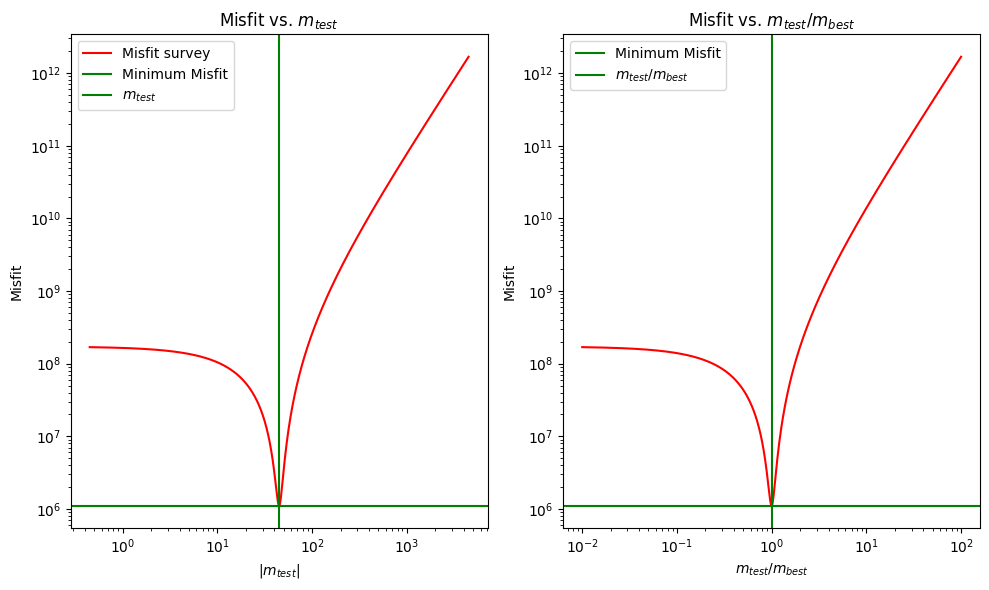

In [123]:
xhalf = (np.min(x_noisy) + np.max(x_noisy)) / 2 # x middle point


yhalf = m_noisy * xhalf + b_noisy # y middle point

print("Midpoint (xhalf, yhalf):", xhalf, yhalf) #checking

m_test = m_noisy * np.logspace(-2, 2, 1001) # defining m_test as given

# defining empty arrays to be used in the for loop
ytest = []
misfits = []

for i in range(len(m_test)):
    # for loop for generating nmisfits and y_tests

    y_test = m_test[i] * (x_noisy - xhalf) + yhalf
    #utilizng formula given with yhalf on the other side
    ytest.append(y_test)


    misfit = np.sum((y_noisy - y_test) ** 2)
    # using residual - misfit formula
    misfits.append(misfit)


# defining figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# plot 1 with Misfit v/s m_test
axs[0].loglog(m_test, misfits, 'r', label = 'Misfit survey')
axs[0].set_xlabel('$|m_{test}|$')
axs[0].set_ylabel('Misfit')
axs[0].set_title('Misfit vs. $m_{test}$')
axs[0].axhline(y=np.min(misfits), color='green', label='Minimum Misfit')
axs[0].axvline(x=m_noisy, color='green',  label='$m_{test}$')
axs[0].legend()
print(np.min(m_test))
print(m_noisy)

#plot 2 Misfit v/s m_test/m_best
axs[1].loglog(m_test / m_noisy, misfits, 'r')
axs[1].set_xlabel(r'$m_{test}/m_{best}$')
axs[1].set_ylabel('Misfit')
axs[1].set_title(r'Misfit vs. $m_{test}/m_{best}$')
axs[1].axhline(y=np.min(misfits), color='green', label='Minimum Misfit')
axs[1].axvline(x=(np.min(100*m_test))/m_noisy, color='green',  label= r'$m_{test}/m_{best}$')
axs[1].legend()

plt.tight_layout()
plt.show()

## **QUESTION 3**

In [ ]:
beatingwaves = loadmat('/content/drive/MyDrive/BeatingWaves.mat', squeeze_me = True)

Text(0, 0.5, 'y')

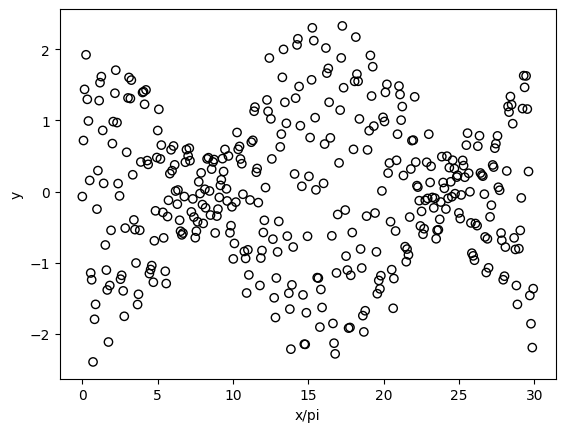

In [ ]:
import matplotlib.pyplot as plt

#printing raw data out
x = beatingwaves['x_noisy']
y = beatingwaves['y_noisy']
plt.scatter(x/np.pi, y, color='black', facecolors='none', edgecolors='black')
plt.xlabel('x/pi')
plt.ylabel('y')

In [ ]:
###Testing if step size of guesses makes a difference
# Case 1 - 0.01 step size

def sinesum(x, f2):
    y = np.sin(2 * x) + np.sin(f2 * x)
    return y

Guess_f2 = np.arange(1.0, 3.0, 0.01) # case 1 stepsize 0.01

misfitfcn = lambda y1, y2: np.sum((y1 - y2) ** 2)

M = np.empty((3, 0))

for i in range(len(Guess_f2)):

    pout, cout = opt.curve_fit(sinesum, x, y, p0=Guess_f2[i], maxfev = 10000)

    misfit = misfitfcn(y, sinesum(x, pout))
    # Stacking Guess_f2, pout, and misfit into a column vector
    column_vector = np.vstack((Guess_f2[i], pout[0], misfit))
    M = np.append(M, column_vector, axis=1)

min_misfit = np.min(M[2])  # min. misfit
max_misfit = np.max(M[2])  # max. misfit
min_index = np.argmin(M[2])  # min. misfit index
max_index = np.argmax(M[2])  # max, misfit index
print("Minimum index:", min_index)
print("Maximum index:", max_index)
print("Minimum misfit:", min_misfit)
print("Maximum misfit:", max_misfit)

highmisfits = Guess_f2[M[2] >= max_misfit]
lowmisfits = Guess_f2[M[2] <= min_misfit]

Minimum index: 117
Maximum index: 30
Minimum misfit: 31.30503698146199
Maximum misfit: 415.5130985824341


In [ ]:
# Case 2 - 0.1 step size

Guess_f2 = np.arange(1.0, 3.0, 0.1)

misfitfcn = lambda y1, y2: np.sum((y1 - y2) ** 2)

M = np.empty((3, 0))

for i in range(len(Guess_f2)):

    pout, cout = opt.curve_fit(sinesum, x, y, p0=Guess_f2[i], maxfev = 10000)

    misfit = misfitfcn(y, sinesum(x, pout))
    # Stacking Guess_f2, pout, and misfit into a column vector
    column_vector = np.vstack((Guess_f2[i], pout[0], misfit))
    M = np.append(M, column_vector, axis=1)

min_misfit = np.min(M[2])  # min. misfit
max_misfit = np.max(M[2])  # max. misfit
min_index = np.argmin(M[2])  # min. misfit index
max_index = np.argmax(M[2])  # max, misfit index
print("Minimum index:", min_index)
print("Maximum index:", max_index)
print("Minimum misfit:", min_misfit)
print("Maximum misfit:", max_misfit)



Minimum index: 11
Maximum index: 3
Minimum misfit: 31.30503698153009
Maximum misfit: 415.5130985824341


In [ ]:
# Case 3 - 0.001 step size

Guess_f2 = np.arange(1.0, 3.0, 0.001)
misfitfcn = lambda y1, y2: np.sum((y1 - y2) ** 2)

M = np.empty((3, 0))

for i in range(len(Guess_f2)):

    pout, cout = opt.curve_fit(sinesum, x, y, p0=Guess_f2[i], maxfev = 10000)

    misfit = misfitfcn(y, sinesum(x, pout))
    # Stacking Guess_f2, pout, and misfit into a column vector
    column_vector = np.vstack((Guess_f2[i], pout[0], misfit))
    M = np.append(M, column_vector, axis=1)

min_misfit = np.min(M[2])  # min. misfit
max_misfit = np.max(M[2])  # max. misfit
min_index = np.argmin(M[2])  # min. misfit index
max_index = np.argmax(M[2])  # max, misfit index
print("Minimum index:", min_index)
print("Maximum index:", max_index)
print("Minimum misfit:", min_misfit)
print("Maximum misfit:", max_misfit)

highmisfits = Guess_f2[M[2] >= max_misfit]
lowmisfits = Guess_f2[M[2] <= min_misfit]



Minimum index: 1143
Maximum index: 325
Minimum misfit: 31.305036981458848
Maximum misfit: 415.51310115858143


# **The values of Maximum and Minimum misfits do not change based on stepsize**

In [ ]:
### same code over here for my own clarity
# step size == 0.01


def sinesum(x, f2):
    y = np.sin(2 * x) + np.sin(f2 * x)
    return y

Guess_f2 = np.arange(1.0, 3.0, 0.01)  # case 1 stepsize 0.01

misfitfcn = lambda y1, y2: np.sum((y1 - y2) ** 2)

M = np.empty((3, 0))

for i in range(len(Guess_f2)):

    pout, cout = opt.curve_fit(sinesum, x, y,
                               p0=Guess_f2[i], maxfev = 10000)

    misfit = misfitfcn(y, sinesum(x, pout))

    #vstack inspiration from perplexity.ai
    column_vector = np.vstack((Guess_f2[i], pout[0], misfit))
    M = np.append(M, column_vector, axis=1)

min_misfit = np.min(M[2])  # min. misfit
max_misfit = np.max(M[2])  # max. misfit
min_index = np.argmin(M[2])  # min. misfit index
max_index = np.argmax(M[2])  # max, misfit index

print("Minimum index:", min_index)
print("Maximum index:", max_index)
print("Minimum misfit:", min_misfit)
print("Maximum misfit:", max_misfit)



Minimum index: 117
Maximum index: 30
Minimum misfit: 31.30503698146199
Maximum misfit: 415.5130985824341


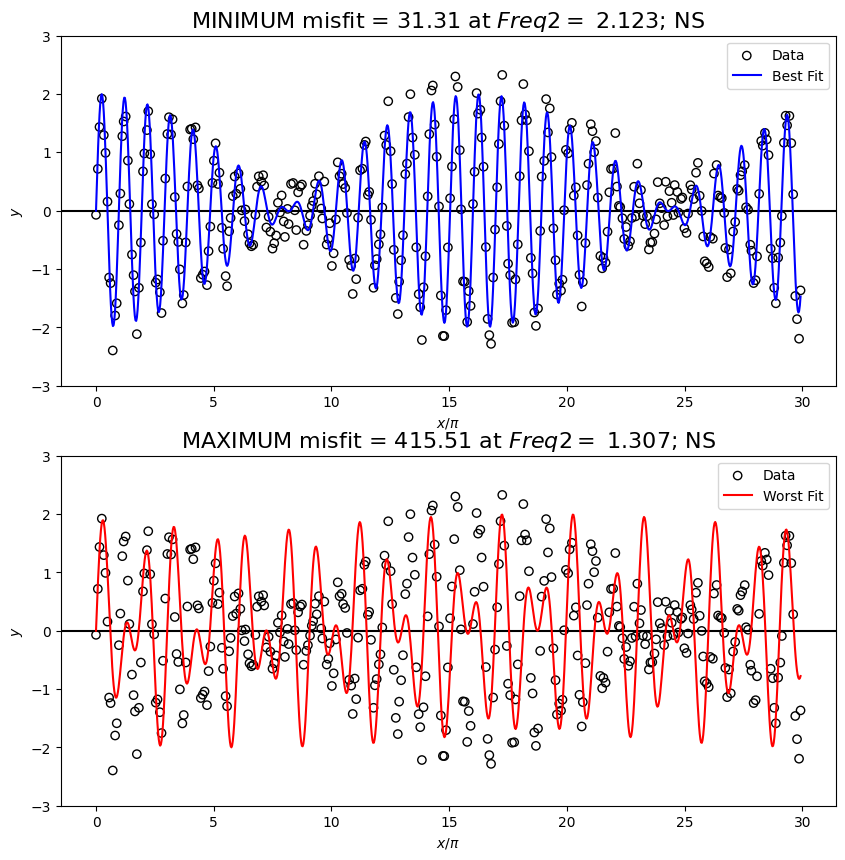

In [ ]:
#defining figure with 2 subplots

fig, ax = plt.subplots(2,1, figsize = (10,10))


### Minimum misfit plot ###
ax[0].scatter(x/np.pi, y, color='black', facecolors='none', edgecolors='black',label = 'Data')
ax[0].set_xlabel("$x/\pi$")
ax[0].set_ylabel("$y$")
ax[0].axhline(color = "k")
ax[0].set_ylim(-3,3)

x_smooth = np.linspace(np.min(x), np.max(x), 1000, endpoint = True)

ax[0].plot(x_smooth/np.pi, sinesum(x_smooth, M[1, min_index]),  '-b', label = "Best Fit")

ax[0].set_title(r"MINIMUM misfit = {0:3.2f} at $Freq2 =$ {1:2.3f}; NS".format(M[2,min_index], M[1,min_index]),
                fontsize= 16)

ax[0].legend(loc = "upper right")

### Maximum misfit plot ###
ax[1].scatter(x/np.pi, y, color='black', facecolors='none', edgecolors='black',label = 'Data')
ax[1].set_xlabel("$x/\pi$")
ax[1].set_ylabel("$y$")
ax[1].axhline(color = "k")\

ax[1].set_ylim(-3,3)

x_smooth = np.linspace(np.min(x), np.max(x), 1000, endpoint = True)

ax[1].plot(x_smooth/np.pi, sinesum(x_smooth, M[1, max_index]),  '-r', label = "Worst Fit")

ax[1].set_title(r"MAXIMUM misfit = {0:3.2f} at $Freq2 =$ {1:2.3f}; NS".format(M[2,max_index], M[1,max_index]),
                fontsize= 16)

ax[1].legend(loc = "upper right")

In [ ]:
# defining empty arrays to be used in loops
lowmisfits = []
highmisfits = []
lowmisfits_M = np.empty((3, 0))
highmisfits_M = np.empty((3, 0))


for i in range(len(Guess_f2)):

    #running this loop again this time it checks the misfit value and stores
    # important for plotting yellow and green later

    pout, cout = opt.curve_fit(sinesum, x, y, p0=Guess_f2[i], maxfev=10000)
    misfit = misfitfcn(y, sinesum(x, pout))
    #defining if statements according to problem

    if misfit <= 50:
        lowmisfits.append(misfit)
        lowmisfits_M = np.append(lowmisfits_M, np.array([[M[0, i]], [M[1, i]], [M[2, i]]]), axis=1)
        #storing corresponding M values

    elif misfit >= 410:
        highmisfits.append(misfit)
        highmisfits_M = np.append(highmisfits_M, np.array([[M[0, i]], [M[1, i]], [M[2, i]]]), axis=1)
        #storing corresponding M values

'''print(lowmisfits)
print(highmisfits)

print(highmisfits_M[0, :])
print(highmisfits_M[1, :])
print(highmisfits_M[2, :])'''

'print(lowmisfits)\nprint(highmisfits)\n\nprint(highmisfits_M[0, :])\nprint(highmisfits_M[1, :])\nprint(highmisfits_M[2, :])'

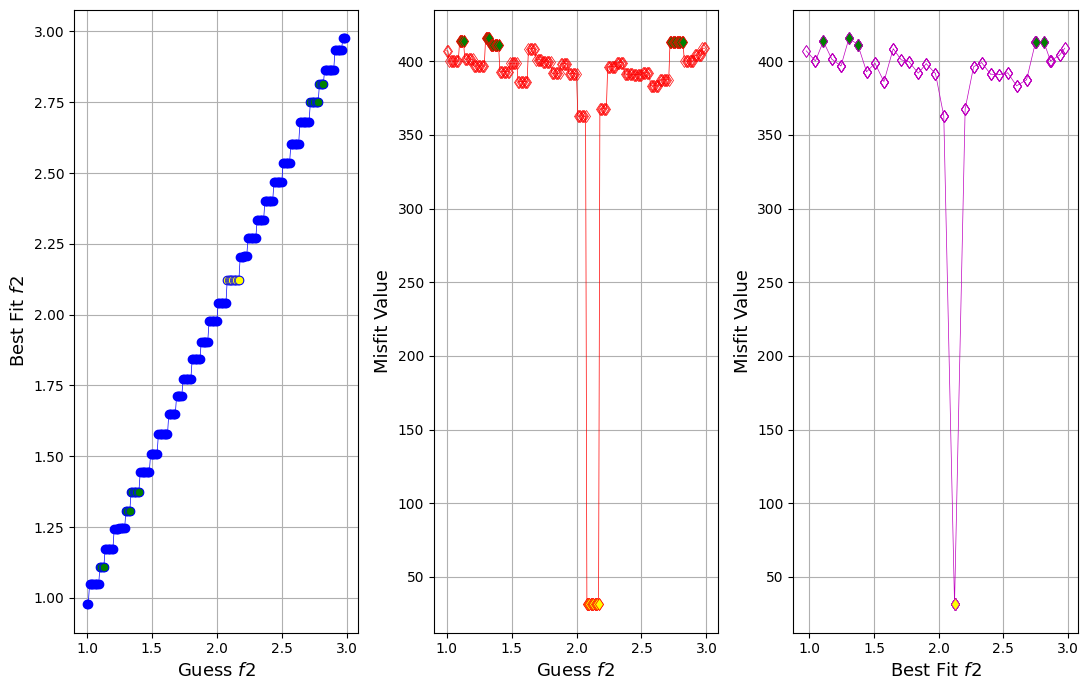

In [ ]:
##Misfit space##


fig, ax = plt.subplots(1,3, figsize = (11,7))


# figure 1 - best fit v/s guess
ax[0].plot(M[0,:], M[1,:], 'o', mec = "b", ls = '-', lw = 0.5, color = 'b' )
ax[0].set_xlabel("Guess $f2$", fontsize = 13)
ax[0].set_ylabel("Best Fit $f2$", fontsize = 13)
ax[0].grid(zorder = -1)

ax[0].plot(lowmisfits_M[0, :], lowmisfits_M[1, :], 'o', mec = "b", mew = 0.5, mfc = "yellow", color = 'b' )
#plotting minimum values
ax[0].plot(highmisfits_M[0, :], highmisfits_M[1, :], 'o', mec = "b", mew = 0.5, mfc = "green" )
#plotting maximum values


# figure 2 - misfit v/s guess

ax[1].plot(M[0,:], M[2,:], 'd', mec = "r", mew = 0.5, mfc = "none", ls = '-', lw = 0.5, color = 'r' )
ax[1].set_xlabel("Guess $f2$", fontsize = 13)
ax[1].set_ylabel("Misfit Value", fontsize = 13)
ax[1].grid(zorder = -1)

ax[1].plot(lowmisfits_M[0, :], lowmisfits_M[2, :], 'd', mec = "r", mew = 0.5, mfc = "yellow", color = 'b' )
#plotting minimum misfit values
ax[1].plot(highmisfits_M[0, :], highmisfits_M[2, :], 'd', mec="r", mew=0.5, mfc="green")
#plotting maximum misfit values


# figure 3 - misfit v/s bestfit

ax[2].plot(M[1,:], M[2,:], 'd', mec = "m", mew = 0.5, mfc = "none", ls = '-', lw = 0.5, color = 'm' )
ax[2].set_xlabel("Best Fit $f2$", fontsize = 13)
ax[2].set_ylabel("Misfit Value", fontsize = 13)
ax[2].grid(zorder = -1)

ax[2].plot(lowmisfits_M[1, :], lowmisfits_M[2, :], 'd', mec="m", mew=0.5, mfc="yellow", color='m')
#plotting minimum misfit values
ax[2].plot(highmisfits_M[1, :], highmisfits_M[2, :], 'd', mec="m", mew=0.5, mfc="green",color='m')
#plotting maximum misfit values


fig.tight_layout()